## __0. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD__

In [90]:
import os

In [26]:
http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

SyntaxError: invalid syntax (3957070673.py, line 1)

In [91]:
CUSTOM_MODEL_NAME = 'tfleafmy_mobile640' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [92]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [93]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [94]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [11]:
# https://www.tensorflow.org/install/source_windows

In [31]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [ ]:
!pip install tensorflow==2.9


In [ ]:
!pip freeze > requirements.txt

In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip install protobuf==3.19

In [ ]:
!pip install tf-models-official==2.9 


In [ ]:
!python -m pip install --upgrade pip


In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [23]:
import object_detection

In [143]:
!pip list

Package                       Version        Editable project location
----------------------------- -------------- -----------------------------------------------------------
absl-py                       1.4.0
anyio                         4.4.0
apache-beam                   2.57.0
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.3.0
asttokens                     2.4.1
astunparse                    1.6.3
async-lru                     2.0.4
async-timeout                 4.0.3
attrs                         23.2.0
avro-python3                  1.10.2
Babel                         2.15.0
beautifulsoup4                4.12.3
bleach                        6.1.0
cachetools                    5.3.3
certifi                       2024.7.4
cffi                          1.16.0
charset-normalizer            3.3.2
click                         8.1.7
cloudpickle                   2.2.1
colorama             

In [54]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20518283 / 20518283        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [95]:
labels = [{'name':'tomatoleaf', 'id':1}, {'name':'otherleaf', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [98]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [99]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [100]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [101]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [ ]:
!pip install tensorflow-gpu==2.9.0

# 5. Update Config For Transfer Learning

In [102]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [103]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [104]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [105]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [117]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [118]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [119]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [121]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [112]:
import gc
gc.collect()
tf.keras.backend.clear_session()

In [111]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=2024),
         tf.config.LogicalDeviceConfiguration(memory_limit=2024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Virtual devices cannot be modified after being initialized


In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [122]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [126]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\tfleafmy_mobile640 --pipeline_config_path=Tensorflow\workspace\models\tfleafmy_mobile640\pipeline.config --num_train_steps=3000


In [20]:
!{command}

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0728 22:02:48.946174 16512 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3000
I0728 22:02:48.946174 16512 config_util.py:552] Maybe overwriting train_steps: 3000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0728 22:02:48.946174 16512 config_util.py:552] Maybe overwriting use_bfloat16: False
I0728 22:02:48.956182 16512 ssd_efficientnet_bifpn_feature_extractor.py:161] EfficientDet EfficientNet backbone version: efficientnet-b4
I0728 22:02:48.956182 16512 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 224
I0728 22:02:48.956182 16512 ssd_efficientnet_bifpn_feature_extractor.py:164] EfficientDet BiFPN num iterations: 7
I0728 22:02:48.956182 16512 efficientnet_model.py:143] round_filter input=32 output=48
INFO:tensorflow:Reduce to /job:

In [33]:
!pip install tensorflow_addons==0.18.0

   ---------------------------------------- 0.0/765.9 kB ? eta -:--:--
   ------------------- ------------------- 389.1/765.9 kB 12.2 MB/s eta 0:00:01
   --------------------------------------- 765.9/765.9 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_addons
    Found existing installation: tensorflow-addons 0.22.0
    Uninstalling tensorflow-addons-0.22.0:
      Successfully uninstalled tensorflow-addons-0.22.0


# 7. Evaluate the Model

In [94]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [95]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\tfleafmy_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\tfleafmy_ssd_mobnet_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\tfleafmy_ssd_mobnet_tuned


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [127]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [128]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-8')).expect_partial()

@tf.function
def detect_fn(image):
    if not hasattr(detect_fn, 'initialized'):
        detect_fn.initialized = True
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [129]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [130]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [133]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '0a0097e5-WhatsApp_Image_2024-07-28_at_4.36.09_PM_2.jpg')

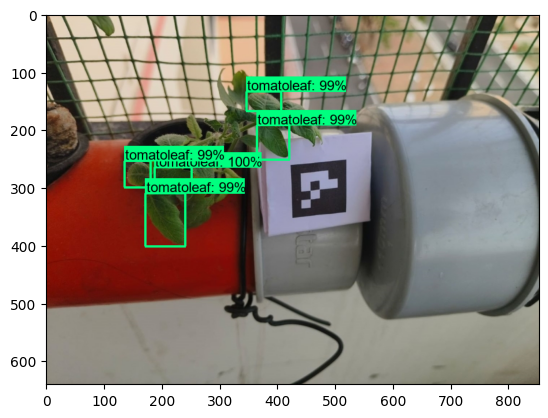

In [134]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

9.b Run with aruco and save the file

9.a.s Run with image as input

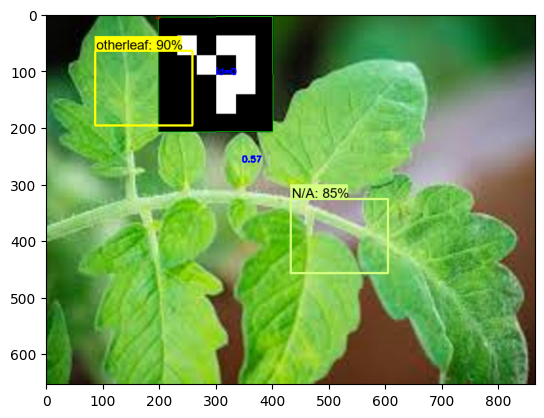

True

In [102]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils

# Function to calculate the distance between two bounding boxes
def calculate_distance_between_boxes(box1, box2):
    center1_x = (box1[1] + box1[3]) / 2
    center1_y = (box1[0] + box1[2]) / 2

    center2_x = (box2[1] + box2[3]) / 2
    center2_y = (box2[0] + box2[2]) / 2

    distance = np.sqrt((center1_x - center2_x) ** 2 + (center1_y - center2_y) ** 2)

    return distance

# Placeholder function for your object detection model
def detect_fn(image):
    # Dummy implementation of object detection
    # Replace this with actual model inference
    return {
        'num_detections': np.array([2]),
        'detection_boxes': np.array([[[0.1, 0.1, 0.3, 0.3], [0.5, 0.5, 0.7, 0.7]]]),
        'detection_classes': np.array([[1, 2]]),
        'detection_scores': np.array([[0.9, 0.85]])
    }

# Load the image
IMAGE_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\images\\test\\Screenshot 2024-07-15 221557.jpg'  # Replace with your image path
img = cv2.imread(IMAGE_PATH)

if img is None:
    raise ValueError("Image not found or unable to read")

image_np = np.array(img)

# ArUco marker detection
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
corners, ids, rejected = detector.detectMarkers(gray)

if ids is not None:
    cv2.aruco.drawDetectedMarkers(image_np, corners, ids)

# Object detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections')[0])  # Extract scalar value
detections = {key: value[0, :num_detections] for key, value in detections.items()}
detections['num_detections'] = num_detections

# Calculate and display distances
bounding_boxes = detections['detection_boxes']
num_boxes = len(bounding_boxes)

for i in range(num_boxes):
    for j in range(i + 1, num_boxes):
        box1 = bounding_boxes[i]
        box2 = bounding_boxes[j]
        distance = calculate_distance_between_boxes(box1, box2)
        
        # Denormalize coordinates
        h, w, _ = image_np.shape
        box1 = box1 * np.array([h, w, h, w])
        box2 = box2 * np.array([h, w, h, w])
        
        center1_x = int((box1[1] + box1[3]) / 2)
        center1_y = int((box1[0] + box1[2]) / 2)
        center2_x = int((box2[1] + box2[3]) / 2)
        center2_y = int((box2[0] + box2[2]) / 2)
        
        # Draw the distance on the image
        mid_x = int((center1_x + center2_x) / 2)
        mid_y = int((center1_y + center2_y) / 2)
        cv2.putText(image_np, f'{distance:.2f}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Visualize the results
label_id_offset = 1
image_np_with_detections = image_np.copy()

# Replace this with your visualization function
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.8,
    agnostic_mode=False
)

# Display the image with distances
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image
cv2.imwrite('output_image_with_distances.jpg', image_np_with_detections)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7796\2297070151.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value


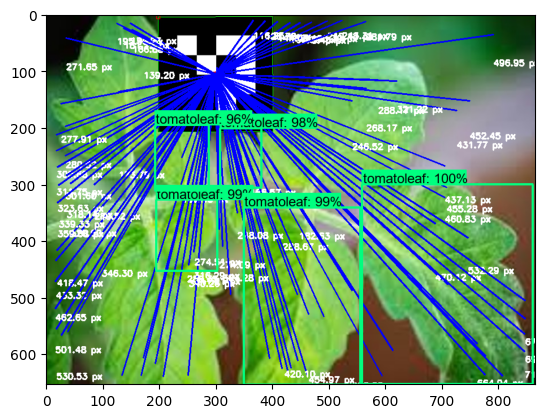

True

In [42]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

# Define paths
IMAGE_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\images\\test\\Screenshot 2024-07-15 221557.jpg'

CHECKPOINT_PATH = 'CHECKPOINT_PATH'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Function to calculate the distance between two points in pixels
def calculate_distance(point1, point2):
    distance = np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance

# Function to calculate the center of a bounding box
def get_box_center(box, image_shape):
    h, w, _ = image_shape
    center_x = (box[1] + box[3]) / 2 * w
    center_y = (box[0] + box[2]) / 2 * h
    return int(center_x), int(center_y)

# Function to calculate the bottom center of a bounding box
def get_box_bottom_center(box, image_shape):
    h, w, _ = image_shape
    bottom_center_x = (box[1] + box[3]) / 2 * w
    bottom_center_y = box[2] * h
    return int(bottom_center_x), int(bottom_center_y)

# Load the image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError("Image not found or unable to read")

image_np = np.array(img)

# ArUco marker detection
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
corners, ids, _ = detector.detectMarkers(gray)

aruco_center = None
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image_np, corners, ids)
    corner = corners[0][0]
    aruco_center = np.mean(corner, axis=0).astype(int)
    cv2.circle(image_np, tuple(aruco_center), 5, (0, 0, 255), -1)  # Red dot at ArUco center

# Object detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Convert detection classes to integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Calculate and display distances from ArUco marker to bounding boxes
bounding_boxes = detections['detection_boxes']
num_boxes = len(bounding_boxes)

if aruco_center is not None:
    for i in range(num_boxes):
        box = bounding_boxes[i]
        box_center = get_box_center(box, image_np.shape)
        bottom_center = get_box_bottom_center(box, image_np.shape)
        distance_pixels = calculate_distance(aruco_center, box_center)

        # Draw the distance on the image below the bounding box
        offset = 20  # Offset for the text to be below the bounding box
        cv2.putText(image_np, f'{distance_pixels:.2f} px', (bottom_center[0], bottom_center[1] + offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)  # White text

        # Draw line between ArUco center and bounding box center
        cv2.line(image_np, tuple(aruco_center), box_center, (255, 0, 0), 2)  # Blue line

# Visualize the results
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.8,
    agnostic_mode=False
)

# Display the image with distances and lines
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image
cv2.imwrite('output_image_with_distances_and_lines.jpg', image_np_with_detections)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12696\2488079462.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value


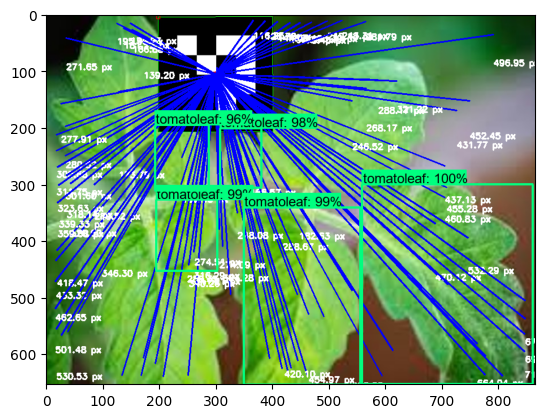

True

In [33]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

# Define paths
IMAGE_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\images\\test\\Screenshot 2024-07-15 221557.jpg'
#PIPELINE_CONFIG = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'
#CHECKPOINT_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\models\\my_ssd_mobnet'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Function to calculate the distance between two points in pixels
def calculate_distance(point1, point2):
    distance = np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance

# Function to calculate the center of a bounding box
def get_box_center(box, image_shape):
    h, w, _ = image_shape
    center_x = (box[1] + box[3]) / 2 * w
    center_y = (box[0] + box[2]) / 2 * h
    return int(center_x), int(center_y)

# Function to calculate the bottom center of a bounding box
def get_box_bottom_center(box, image_shape):
    h, w, _ = image_shape
    bottom_center_x = (box[1] + box[3]) / 2 * w
    bottom_center_y = box[2] * h
    return int(bottom_center_x), int(bottom_center_y)

# Load the image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError("Image not found or unable to read")

image_np = np.array(img)

# ArUco marker detection
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
corners, ids, _ = detector.detectMarkers(gray)

aruco_center = None
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image_np, corners, ids)
    corner = corners[0][0]
    aruco_center = np.mean(corner, axis=0).astype(int)
    cv2.circle(image_np, tuple(aruco_center), 5, (0, 0, 255), -1)  # Red dot at ArUco center

# Object detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Convert detection classes to integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Calculate and display distances from ArUco marker to bounding boxes
bounding_boxes = detections['detection_boxes']
num_boxes = len(bounding_boxes)

if aruco_center is not None:
    for i in range(num_boxes):
        box = bounding_boxes[i]
        box_center = get_box_center(box, image_np.shape)
        bottom_center = get_box_bottom_center(box, image_np.shape)
        distance_pixels = calculate_distance(aruco_center, box_center)

        # Draw the distance on the image below the bounding box
        offset = 20  # Offset for the text to be below the bounding box
        cv2.putText(image_np, f'{distance_pixels:.2f} px', (bottom_center[0], bottom_center[1] + offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)  # White text

        # Draw line between ArUco center and bounding box center
        cv2.line(image_np, tuple(aruco_center), box_center, (255, 0, 0), 2)  # Blue line

# Visualize the results
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.8,
    agnostic_mode=False
)

# Display the image with distances and lines
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image
cv2.imwrite('output_image_with_distances_and_lines.jpg', image_np_with_detections)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12696\723502881.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value


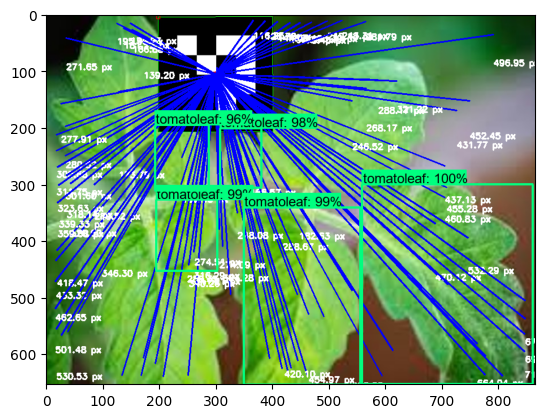

True

In [34]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

# Define custom model name
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'

# Define paths
paths = {
    'SCRIPTS_PATH': os.path.join('Tensorflow', 'scripts'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace', 'annotations'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME)
}

# File paths
files = {
    'PIPELINE_CONFIG': os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], 'generate_tfrecord.py'),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], 'label_map.pbtxt')
}

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Function to calculate the distance between two points in pixels
def calculate_distance(point1, point2):
    distance = np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance

# Function to calculate the center of a bounding box
def get_box_center(box, image_shape):
    h, w, _ = image_shape
    center_x = (box[1] + box[3]) / 2 * w
    center_y = (box[0] + box[2]) / 2 * h
    return int(center_x), int(center_y)

# Function to calculate the bottom center of a bounding box
def get_box_bottom_center(box, image_shape):
    h, w, _ = image_shape
    bottom_center_x = (box[1] + box[3]) / 2 * w
    bottom_center_y = box[2] * h
    return int(bottom_center_x), int(bottom_center_y)

# Define image path
IMAGE_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\images\\test\\Screenshot 2024-07-15 221557.jpg'

# Load the image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError("Image not found or unable to read")

image_np = np.array(img)

# ArUco marker detection
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
corners, ids, _ = detector.detectMarkers(gray)

aruco_center = None
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image_np, corners, ids)
    corner = corners[0][0]
    aruco_center = np.mean(corner, axis=0).astype(int)
    cv2.circle(image_np, tuple(aruco_center), 5, (0, 0, 255), -1)  # Red dot at ArUco center

# Object detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections').numpy())  # Extract scalar value
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Convert detection classes to integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Calculate and display distances from ArUco marker to bounding boxes
bounding_boxes = detections['detection_boxes']
num_boxes = len(bounding_boxes)

if aruco_center is not None:
    for i in range(num_boxes):
        box = bounding_boxes[i]
        box_center = get_box_center(box, image_np.shape)
        bottom_center = get_box_bottom_center(box, image_np.shape)
        distance_pixels = calculate_distance(aruco_center, box_center)

        # Draw the distance on the image below the bounding box
        offset = 20  # Offset for the text to be below the bounding box
        cv2.putText(image_np, f'{distance_pixels:.2f} px', (bottom_center[0], bottom_center[1] + offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)  # White text

        # Draw line between ArUco center and bounding box center
        cv2.line(image_np, tuple(aruco_center), box_center, (255, 0, 0), 2)  # Blue line

# Visualize the results
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.8,
    agnostic_mode=False
)

# Display the image with distances and lines
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image
cv2.imwrite('output_image_with_distances_and_lines.jpg', image_np_with_detections)

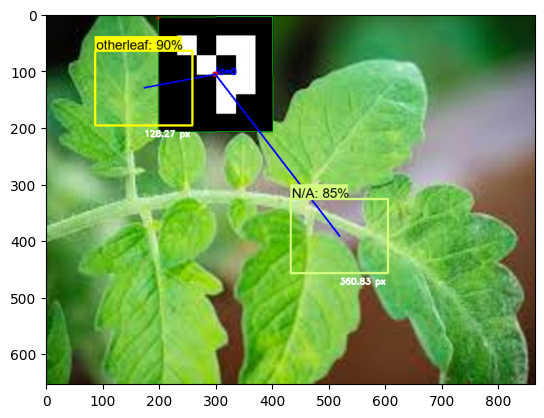

True

In [44]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils

# Function to calculate the distance between two points in pixels
def calculate_distance(point1, point2):
    distance = np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance

# Function to calculate the center of a bounding box
def get_box_center(box, image_shape):
    h, w, _ = image_shape
    center_x = (box[1] + box[3]) / 2 * w
    center_y = (box[0] + box[2]) / 2 * h
    return int(center_x), int(center_y)

# Function to calculate the bottom center of a bounding box
def get_box_bottom_center(box, image_shape):
    h, w, _ = image_shape
    bottom_center_x = (box[1] + box[3]) / 2 * w
    bottom_center_y = box[2] * h
    return int(bottom_center_x), int(bottom_center_y)

# Placeholder function for your object detection model
def detect_fn(image):
    # Dummy implementation of object detection
    # Replace this with actual model inference
    return {
        'num_detections': np.array([2]),
        'detection_boxes': np.array([[[0.1, 0.1, 0.3, 0.3], [0.5, 0.5, 0.7, 0.7]]]),
        'detection_classes': np.array([[1, 2]]),
        'detection_scores': np.array([[0.9, 0.85]])
    }

# Load the image
IMAGE_PATH = 'D:\\AI_Tensorflow\\TFODCourse\\Tensorflow\\workspace\\images\\test\\Screenshot 2024-07-15 221557.jpg'  # Replace with your image path
img = cv2.imread(IMAGE_PATH)

if img is None:
    raise ValueError("Image not found or unable to read")

image_np = np.array(img)

# ArUco marker detection
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
corners, ids, _ = detector.detectMarkers(gray)

aruco_center = None

if ids is not None:
    cv2.aruco.drawDetectedMarkers(image_np, corners, ids)
    # Assuming only one ArUco marker is detected for simplicity
    corner = corners[0][0]
    aruco_center = np.mean(corner, axis=0).astype(int)
    cv2.circle(image_np, tuple(aruco_center), 5, (0, 0, 255), -1)  # Red dot at ArUco center

# Object detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections')[0])  # Extract scalar value
detections = {key: value[0, :num_detections] for key, value in detections.items()}
detections['num_detections'] = num_detections

# Calculate and display distances from ArUco marker to bounding boxes
bounding_boxes = detections['detection_boxes']
num_boxes = len(bounding_boxes)

if aruco_center is not None:
    for i in range(num_boxes):
        box = bounding_boxes[i]
        box_center = get_box_center(box, image_np.shape)
        bottom_center = get_box_bottom_center(box, image_np.shape)
        distance_pixels = calculate_distance(aruco_center, box_center)
        
        # Draw the distance on the image below the bounding box
        offset = 20  # Offset for the text to be below the bounding box
        cv2.putText(image_np, f'{distance_pixels:.2f} px', (bottom_center[0], bottom_center[1] + offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)  # White text
        
        # Draw line between ArUco center and bounding box center
        cv2.line(image_np, tuple(aruco_center), box_center, (255, 0, 0), 2)  # Blue line

# Visualize the results
label_id_offset = 1
image_np_with_detections = image_np.copy()

# Replace this with your visualization function
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.8,
    agnostic_mode=False
)

# Display the image with distances and lines
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Save the image
cv2.imwrite('output_image_with_distances_and_lines.jpg', image_np_with_detections)

In [23]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils

# Function to run image detection and save the output image
def run_image_detection_and_save(frame, output_path="output_with_detections.jpg"):
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes'] + label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    # Save the image with detections
    cv2.imwrite(output_path, image_np_with_detections)
    print(f"Output image saved at {output_path}")

    # Optionally display the image (comment this out if not needed)
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

# ArUco marker detection code with image detection integration
import cv2.aruco as aruco
from scipy.spatial.transform import Rotation
import time

# Camera matrix and distortion coefficients
camera_matrix = np.array([
    [583.52371648, 0., 296.37015552], 
    [0., 627.94558759, 358.30354553],
    [0., 0., 1.]
])
camera_distortion = np.array([0.37230818, -0.4038794, 0.13492957, -0.00807964, 0.30939183])

# Define the dictionary and detector parameters
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
parameters = aruco.DetectorParameters()

# Define the 3D coordinates of the marker corners in meters
marker_size = 0.1  # size of the marker in meters
obj_points = np.array([
    [-marker_size / 2, marker_size / 2, 0],
    [ marker_size / 2, marker_size / 2, 0],
    [ marker_size / 2, -marker_size / 2, 0],
    [-marker_size / 2, -marker_size / 2, 0]
], dtype=np.float32)

# Initialize the video capture
cap = cv2.VideoCapture(1)

camera_width = 640
camera_height = 480
camera_frame_rate = 40

cap.set(cv2.CAP_PROP_FRAME_WIDTH, camera_width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, camera_height)
cap.set(cv2.CAP_PROP_FPS, camera_frame_rate)

prev_time = time.time()
frame_count = 0
fps = 0  # Variable to store the FPS value

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect ArUco markers
    detector = aruco.ArucoDetector(aruco_dict, parameters)
    corners, ids, rejected = detector.detectMarkers(gray_frame)

    if ids is not None:
        # Draw detected markers
        aruco.drawDetectedMarkers(frame, corners, ids)

        for i in range(len(ids)):
            # Estimate pose of each marker using SOLVEPNP_IPPE_SQUARE
            success, rvec, tvec = cv2.solvePnP(obj_points, corners[i][0], camera_matrix, camera_distortion, flags=cv2.SOLVEPNP_IPPE_SQUARE)

            if success:
                rvec = rvec.reshape((3, 1))  # Ensure rvec is 3x1
                tvec = tvec.reshape((3, 1))  # Ensure tvec is 3x1

                # Draw axis for each marker
                cv2.drawFrameAxes(frame, camera_matrix, camera_distortion, rvec, tvec, 0.1)

                # Convert translation from meters to millimeters
                tvec_mm = tvec * 1000  # Convert to millimeters

                # Calculate camera position
                rmat = cv2.Rodrigues(rvec)[0]
                camera_position = -np.matrix(rmat).T @ np.matrix(tvec)

                # Extract scalar values from the translation vector in mm
                tvec_str = "x={:.2f} mm y={:.2f} mm z={:.2f} mm".format(tvec_mm[0][0], tvec_mm[1][0], tvec_mm[2][0])
                cv2.putText(frame, tvec_str, (20, 460), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2, cv2.LINE_AA)

                # Extract rotation angles
                r = Rotation.from_rotvec([rvec[0][0], rvec[1][0], rvec[2][0]])
                rot = r.as_euler('xyz', degrees=True)

                tx = round(camera_position[0, 0] * 1000, 2)  # Convert to millimeters
                ty = round(camera_position[1, 0] * 1000, 2)  # Convert to millimeters
                tz = round(camera_position[2, 0] * 1000, 2)  # Convert to millimeters

                rx = round(180 - rot[0], 2)
                ry = round(rot[1], 2)
                rz = round(rot[2], 2)

                rot_str = "rx={:.2f} ry={:.2f} rz={:.2f}".format(rx, ry, rz)
                cv2.putText(frame, rot_str, (20, 420), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2, cv2.LINE_AA)

                # Run image detection on the current frame and save the output
                detection_output_path = f"output_with_detections_{time.time()}.jpg"
                run_image_detection_and_save(frame, detection_output_path)

    # Calculate and display FPS every 10 frames
    frame_count += 1
    if frame_count >= 10:
        current_time = time.time()
        elapsed_time = current_time - prev_time
        fps = frame_count / elapsed_time
        frame_count = 0
        prev_time = current_time

    fps_str = "FPS: {:.2f}".format(fps)
    cv2.putText(frame, fps_str, (20, 380), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('frame', frame)

    # Break the loop on 'q' key press
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

###### 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [31]:
cap = cv2.VideoCapture(1)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [135]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [136]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [137]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\tfleafmy_mobile640\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\tfleafmy_mobile640 --output_directory=Tensorflow\workspace\models\tfleafmy_mobile640\export


In [138]:
!{command}

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0728 23:21:43.853825 26308 deprecation.py:623] From D:\AI_Tensorflow\TFODCourse\tfleafclass\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
I0728 23:21:47.233347 26308 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
I0728 23:21:53.793907 26308 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
I0728 23:21:

In [ ]:
!pip install tensorflow-estimator==2.9

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [19]:
print(tf.__version__)

2.9.0


In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [140]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [105]:
!pip uninstall tensorboard

^C


In [90]:
!pip install tensorboard==2.9

In [141]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [142]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\tfleafmy_mobile640\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\tfleafmy_mobile640 --output_directory=Tensorflow\workspace\models\tfleafmy_mobile640\tfliteexport


In [143]:
!{command}

I0728 23:24:27.281050 13648 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
I0728 23:24:30.936628 13648 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
I0728 23:24:32.830184 13648 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
W0728 23:24:33.841610 13648 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x000001928CE952E0>, because it is not built.
W0728 23:24:34.043737 13648 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x000001928CF92070>, because it is not built.
W0728 23:24:34.043737 13648 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001930BF47B20>, because it is not built.
W0728 23:24:34.043737 13648 save_imp

In [144]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [145]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [146]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\tfleafmy_mobile640\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\tfleafmy_mobile640\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [147]:
!{command}

Estimated count of arithmetic ops: 6.806 G  ops, equivalently 3.403 G  MACs


2024-07-28 23:25:37.482721: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-07-28 23:25:37.482753: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.


# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [148]:
import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

class MetadataPopulatorForImageClassifier:
    def __init__(self, model_file, label_file_path):
        self.model_file = model_file
        self.label_file_path = label_file_path
        self.metadata_buf = None

    def populate(self):
        self._create_metadata()
        self._populate_metadata()

    def _create_metadata(self):
        # Model metadata
        model_meta = _metadata_fb.ModelMetadataT()
        model_meta.name = "Tomato Leaf Classifier"
        model_meta.description = "Classifies images of tomato leaves as either 'tomatoleaf' or 'otherleaf'."
        model_meta.version = "v1"

        # Input metadata
        input_meta = _metadata_fb.TensorMetadataT()
        input_meta.name = "image"
        input_meta.description = "Input image to be classified."
        input_meta.content = _metadata_fb.ContentT()
        input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
        input_meta.content.contentProperties.colorSpace = _metadata_fb.ColorSpaceType.RGB
        input_meta.content.contentPropertiesType = _metadata_fb.ContentProperties.ImageProperties
        input_meta.content.range = _metadata_fb.ValueRangeT()
        input_meta.content.range.min = 0
        input_meta.content.range.max = 1
        input_meta.processUnits = [_metadata_fb.ProcessUnitT()]
        input_meta.processUnits[0].optionsType = _metadata_fb.ProcessUnitOptions.NormalizationOptions
        input_meta.processUnits[0].options = _metadata_fb.NormalizationOptionsT()
        input_meta.processUnits[0].options.mean = [127.5]
        input_meta.processUnits[0].options.std = [127.5]

        # Output metadata for bounding boxes
        output_meta_1 = _metadata_fb.TensorMetadataT()
        output_meta_1.name = "Bounding Boxes"
        output_meta_1.description = "The locations of the detected bounding boxes."
        output_meta_1.content = _metadata_fb.ContentT()
        output_meta_1.content.contentProperties = _metadata_fb.BoundingBoxPropertiesT()
        output_meta_1.content.contentProperties.index = [0, 1, 2, 3]  # Assuming the bounding box tensor has 4 indices
        output_meta_1.content.contentPropertiesType = _metadata_fb.ContentProperties.BoundingBoxProperties

        # Output metadata for class scores
        output_meta_2 = _metadata_fb.TensorMetadataT()
        output_meta_2.name = "Class Scores"
        output_meta_2.description = "Scores for each detected object."
        output_meta_2.content = _metadata_fb.ContentT()
        output_meta_2.content.contentProperties = _metadata_fb.FeaturePropertiesT()
        output_meta_2.content.contentPropertiesType = _metadata_fb.ContentProperties.FeatureProperties

        # Output metadata for number of detections
        output_meta_3 = _metadata_fb.TensorMetadataT()
        output_meta_3.name = "Number of Detections"
        output_meta_3.description = "Number of detected objects."
        output_meta_3.content = _metadata_fb.ContentT()
        output_meta_3.content.contentProperties = _metadata_fb.FeaturePropertiesT()
        output_meta_3.content.contentPropertiesType = _metadata_fb.ContentProperties.FeatureProperties

        # Output metadata for detection classes
        output_meta_4 = _metadata_fb.TensorMetadataT()
        output_meta_4.name = "Detection Classes"
        output_meta_4.description = "Class of each detected object."
        output_meta_4.content = _metadata_fb.ContentT()
        output_meta_4.content.contentProperties = _metadata_fb.FeaturePropertiesT()
        output_meta_4.content.contentPropertiesType = _metadata_fb.ContentProperties.FeatureProperties

        subgraph = _metadata_fb.SubGraphMetadataT()
        subgraph.inputTensorMetadata = [input_meta]
        subgraph.outputTensorMetadata = [output_meta_1, output_meta_2, output_meta_3, output_meta_4]

        model_meta.subgraphMetadata = [subgraph]

        b = flatbuffers.Builder(0)
        b.Finish(
            model_meta.Pack(b),
            _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
        self.metadata_buf = b.Output()

    def _populate_metadata(self):
        populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
        populator.load_metadata_buffer(self.metadata_buf)
        populator.load_associated_files([self.label_file_path])
        populator.populate()

if __name__ == "__main__":
    model_file = "detect.tflite"
    label_file = "labels.txt"

    populator = MetadataPopulatorForImageClassifier(model_file, label_file)
    populator.populate()

    displayer = _metadata.MetadataDisplayer.with_model_file(model_file)
    export_json_file = os.path.splitext(model_file)[0] + ".json"
    json_file = displayer.get_metadata_json()
    with open(export_json_file, "w") as f:
        f.write(json_file)

    print("Metadata populated and saved to", export_json_file)
    print(displayer.get_packed_associated_file_list())

Metadata populated and saved to detect.json
['labels.txt']


D:\AI_Tensorflow\TFODCourse\tfleafclass\lib\site-packages\tensorflow_lite_support\metadata\python\metadata.py:395: UserWarning: File, 'labels.txt', does not exist in the metadata. But packing it to tflite model is still allowed.
  warnings.warn(


In [149]:
import tensorflow as tf

def check_tflite_model(model_path):
    try:
        # Load the TFLite model and allocate tensors
        interpreter = tf.lite.Interpreter(model_path=model_path)
        interpreter.allocate_tensors()
        print("The model is a valid TFLite model.")
    except Exception as e:
        print(f"Error: {e}")

# Path to your TFLite model
model_path = "detect.tflite"
check_tflite_model(model_path)

The model is a valid TFLite model.


In [7]:
!pip install tflite-support


  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
   ---------------------------------------- 0.0/469.6 kB ? eta -:--:--
   ---------------------------------------- 469.6/469.6 kB 9.8 MB/s eta 0:00:00
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ---------------------------------------- 0.0/238.8 kB ? eta -:--:--
   --------------------------------------- 238.8/238.8 kB 14.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.1 kB ? eta -:--:--
   --------------------------------------- 200.1/200.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.0 requires flatbuffers<2,>=1.12, but you have flatbuffers 24.3.25 which is incompatible.


In [10]:
!pip install flatbuffers==1.12

  Using cached flatbuffers-1.12-py2.py3-none-any.whl.metadata (872 bytes)
Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tflite-support 0.4.2 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.


In [11]:
!pip install tflite-support==0.4

   ---------------------------------------- 0.0/439.5 kB ? eta -:--:--
   --------------------------------------  430.1/439.5 kB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 439.5/439.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: tflite-support
    Found existing installation: tflite-support 0.4.2
    Uninstalling tflite-support-0.4.2:
      Successfully uninstalled tflite-support-0.4.2


In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Directory containing the preprocessed dataset
dataset_dir = 'Railway_pre'

# Create training, validation, and testing datasets
train_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),  # Adjust based on your image size
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

# Split validation set to create a test set
validation_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(validation_batches // 5)
validation_dataset = validation_dataset.skip(validation_batches // 5)


Found 5503 files belonging to 7 classes.
Using 4403 files for training.
Found 5503 files belonging to 7 classes.
Using 1100 files for validation.


In [31]:
class_names = train_dataset.class_names
print(class_names)

['Flakings', 'Grooves', 'Joints', 'Railway', 'Shellings', 'Spallings', 'Squats']


In [3]:
import os
import shutil

checkpoints_dir = os.path.join('Railway_pre', '.ipynb_checkpoints')
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)  # Remove the directory and its contents

In [39]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])


In [40]:
from tensorflow.keras import layers, models

# Updated model architecture
model = models.Sequential([
    layers.InputLayer(input_shape=(150, 150, 3)),
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Increased filters
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),  # Added deeper layer
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),  # Added deeper layer
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Increased dense units
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(7, activation='softmax')  # 7 classes
])

# Compile with a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100
)


Epoch 1/30
138/138 [==============================] - 18s 111ms/step - loss: 4.8782 - accuracy: 0.6346 - val_loss: 98.7641 - val_accuracy: 0.0696
Epoch 2/30
138/138 [==============================] - 14s 99ms/step - loss: 1.5115 - accuracy: 0.6866 - val_loss: 151.0559 - val_accuracy: 0.0674
Epoch 3/30
138/138 [==============================] - 14s 98ms/step - loss: 1.0321 - accuracy: 0.7216 - val_loss: 0.7718 - val_accuracy: 0.7432
Epoch 4/30
138/138 [==============================] - 14s 98ms/step - loss: 0.7767 - accuracy: 0.7602 - val_loss: 0.5913 - val_accuracy: 0.8413
Epoch 5/30
138/138 [==============================] - 14s 99ms/step - loss: 0.7061 - accuracy: 0.7799 - val_loss: 0.5466 - val_accuracy: 0.8596
Epoch 6/30
138/138 [==============================] - 14s 100ms/step - loss: 0.6289 - accuracy: 0.8047 - val_loss: 0.5438 - val_accuracy: 0.8265
Epoch 7/30
138/138 [==============================] - 14s 100ms/step - loss: 0.6413 - accuracy: 0.8035 - val_loss: 0.4389 - val_acc

In [55]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')

7/7 [==============================] - 0s 51ms/step - loss: 0.3673 - accuracy: 0.8661
Test accuracy: 0.8660714030265808
